In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from IPython.core.display import display, HTML
import torch.optim as optim
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from nltk.corpus import stopwords
# from torchtext.data.utils import get_tokenizer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re
from tqdm import tqdm
import os
import plotly.io as pio
pio.renderers.default = "browser"
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pickle
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'
import random
# import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
import pandas as pd
import re
import heapq
import warnings
from copy import deepcopy
with warnings.catch_warnings():
    warnings.simplefilter("ignore", DeprecationWarning)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

C:\Users\panha\AppData\Local\Temp\ipykernel_24276\1120328767.py:12: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



device(type='cuda')

# Prepare the Dataset

In [11]:
book_df = pd.read_csv('books_data.csv')
rating_df = pd.read_csv('Books_rating.csv')
df = pd.merge(book_df, rating_df, on = 'Title', how='left')
df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,1402508735,34.99,A2UDBTV5ULMCFF,"Flotte Lotte ""Flolo""",0/1,2.0,1131926400,Hard work,"Reading the first book of ""The Autograph Man"" ..."
2999996,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN,0534400604,NaN,A1EF8V661HR2B5,scheye1,1/1,2.0,1320451200,Worst math book ever,Having a teacher that loved this book didn't h...
2999997,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN,0534400604,NaN,AE68PS07IST7I,Ian Klor,1/3,5.0,1219881600,Excellant Math Book,"This book is well written and easy to use, wel..."
2999998,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant

# Exploratory Data Analysis

In [12]:
print('================================================')
print(rating_df.info())
print('================================================')
print(book_df.info())
print('================================================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  obje

## Check missing values

<AxesSubplot:>

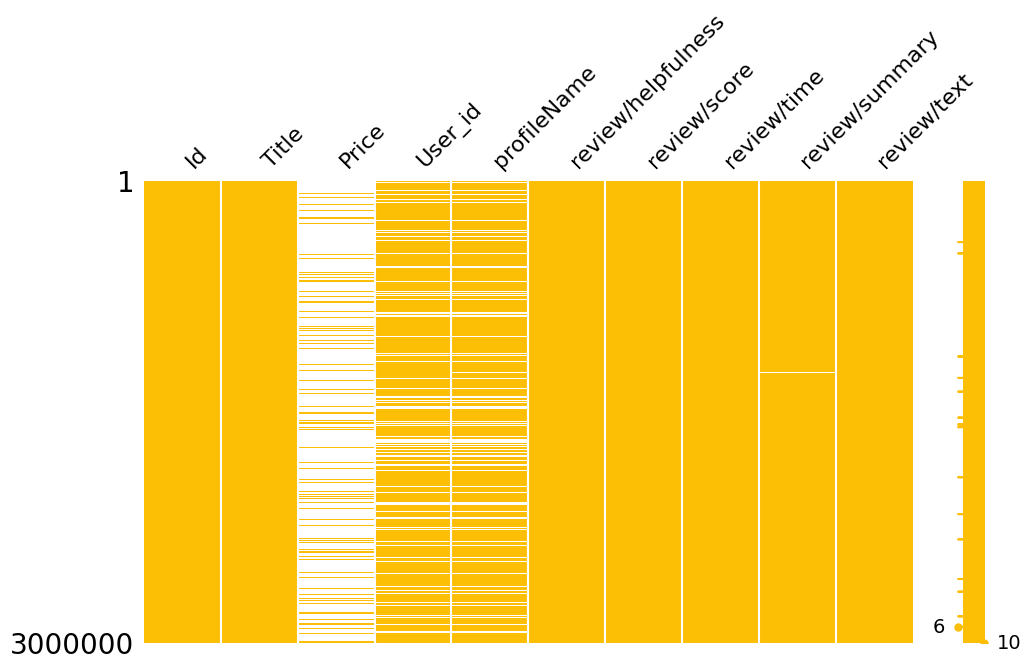

In [13]:
msno.matrix(rating_df,color=(0.99, 0.75, 0.023), figsize = (11, 6))

<AxesSubplot:>

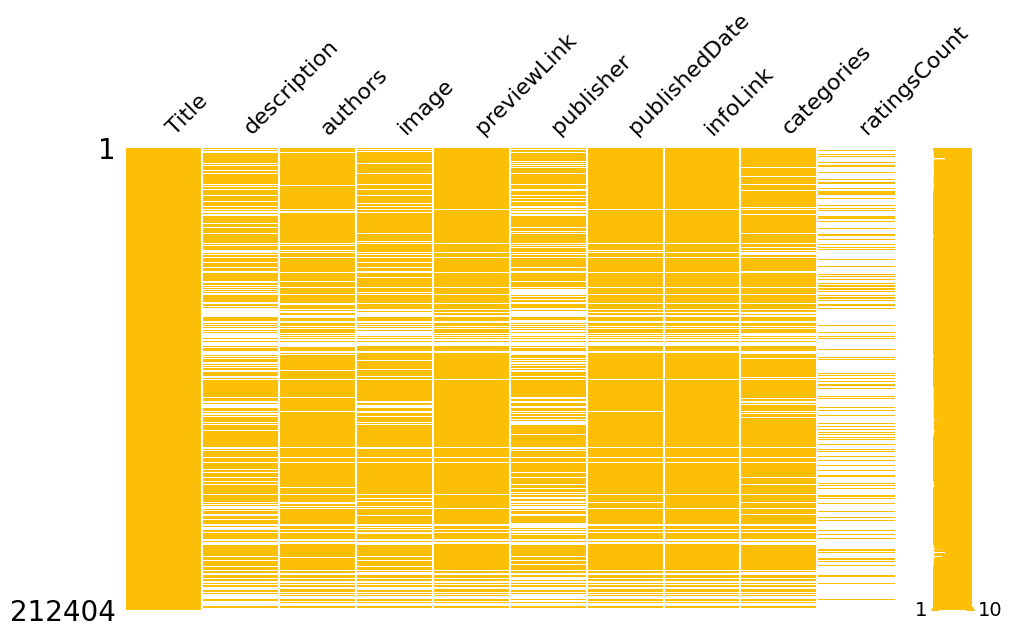

In [14]:
msno.matrix(book_df,color=(0.99, 0.75, 0.023), figsize = (11, 6))

## Review Scores Distribution

In [15]:
colors = ['gold', 'mediumturquoise','brown']
labels = rating_df['review/score'].value_counts().keys().map(str)
values = rating_df['review/score'].value_counts()/rating_df['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

## Which book is the most popular/reviewed? 

In [18]:
user_per_book=rating_df.groupby('Title')['User_id'].count()
user_per_book=user_per_book.sort_values(ascending = False)
fig = px.bar(user_per_book.head(15))
fig = px.bar(user_per_book.head(15), width=1400, height=900)
fig.show()

## Top 15 rated books by authors and publishers

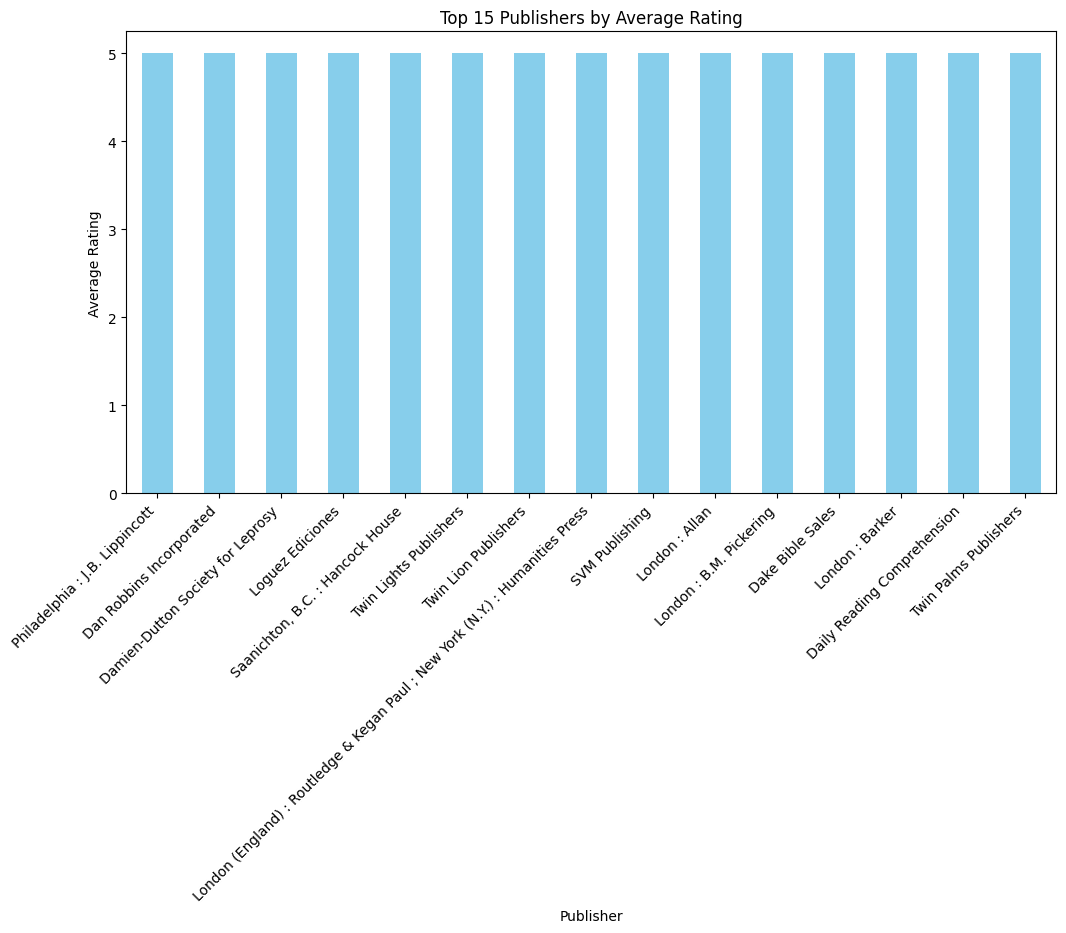

c:\Users\panha\anaconda3\envs\run_gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



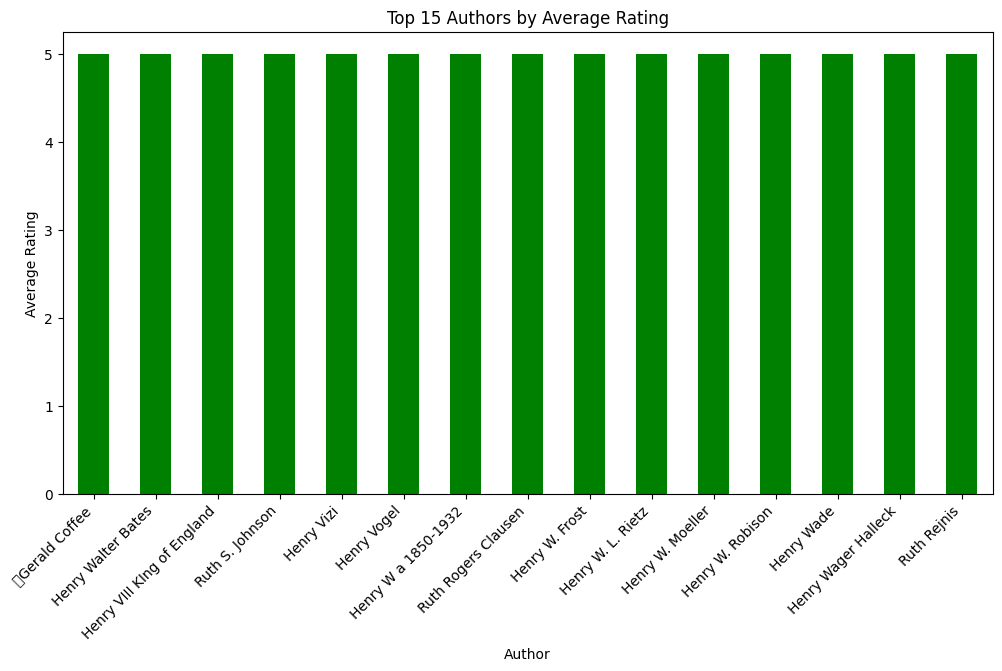

In [8]:
def safe_eval(x):
    try:
        return eval(x) if isinstance(x, str) else x
    except:
        return x
      
average_rating_per_publisher = df.groupby('publisher')['review/score'].mean().sort_values(ascending=False)    
df['authors'] = df['authors'].apply(safe_eval)
exploded_authors = df.explode('authors')

# Group by individual authors
average_rating_per_author = exploded_authors.groupby('authors')['review/score'].mean().sort_values(ascending=False)

# Plotting top 10 publishers
plt.figure(figsize=(12, 6))
average_rating_per_publisher.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Publishers by Average Rating')
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting top 10 authors
plt.figure(figsize=(12, 6))
average_rating_per_author.head(15).plot(kind='bar', color='green')
plt.title('Top 15 Authors by Average Rating')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Correlation Analysis

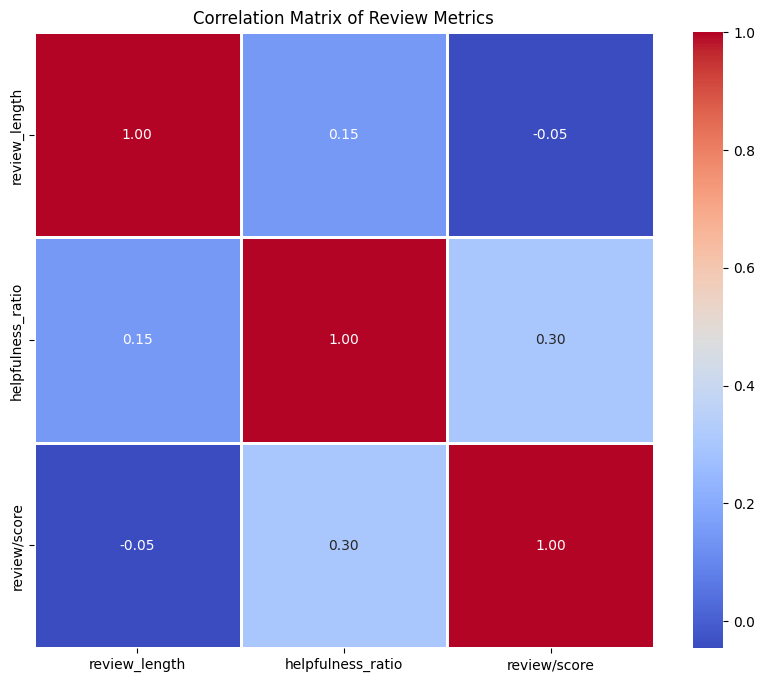

In [9]:
rating_df['review_length'] = rating_df['review/text'].astype(str).apply(len)
rating_df['helpfulness_ratio'] = rating_df['review/helpfulness'].str.split('/').apply(lambda x: int(x[0]) / int(x[1]) if int(x[1]) != 0 else np.nan)
correlation_matrix = rating_df[['review_length', 'helpfulness_ratio', 'review/score']].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=2)
plt.title('Correlation Matrix of Review Metrics')
plt.show()

# Data Preprocessing

In [10]:
df['authors'] = df['authors'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

## - Drop Duplicated Values

In [11]:
df = df.drop_duplicates(subset=['Title', 'authors', 'review/text'])

## - Dealing with Missing Values

In [12]:
columns_to_drop = ['image', 'previewLink', 'infoLink','profileName', 'Price']
df = df.drop(columns=columns_to_drop)

df = df.dropna(subset=['Title', 'User_id'])

textual_columns = ['description', 'authors', 'publisher', 'publishedDate', 'categories', 'review/summary', 'review/text']
df[textual_columns] = df[textual_columns].fillna('')

df['ratingsCount'] = df['ratingsCount'].fillna(df['ratingsCount'].median())

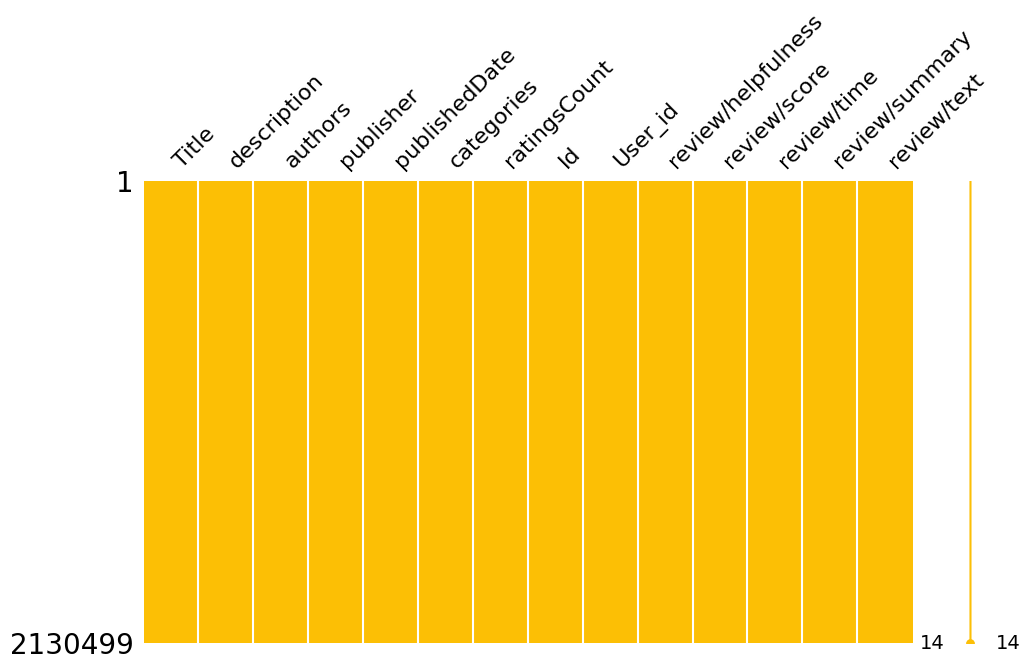

In [13]:
msno.matrix(df,color=(0.99, 0.75, 0.023), figsize = (11, 6))
plt.show()

# ------------------------------ Sentiment Analysis Model ------------------------------

In [14]:
model_path = 'sentiment_model.pth'

class SentimentModel(nn.Module):
    def __init__(self, input_size, hidden_size=32,dropout_rate=0.4):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, hidden_size*2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size*2, hidden_size*4),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size*4, hidden_size*8),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size*8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.sequential(x)


# Load the entire model
sentiment_model=torch.load(model_path)
sentiment_model.to(device)

SentimentModel(
  (sequential): Sequential(
    (0): Linear(in_features=12000, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=128, out_features=256, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=256, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [15]:
# class SentimentAnalysisDataset(torch.utils.data.Dataset):  
#     def __init__(self, texts, vectorizer, sentiment_model, device):
#         """
#         A dataset for sentiment analysis.

#         Args:
#             texts (list): List of text reviews.
#             vectorizer: The vectorizer used during training.
#             sentiment_model: The trained sentiment analysis model.
#             device: The device (CPU/GPU) to which the tensor should be sent.
#         """
#         self.texts = texts
#         self.vectorizer = vectorizer
#         self.sentiment_model = sentiment_model
#         self.device = device

#     def __len__(self):
#         """
#         Returns the total number of samples in the dataset.

#         Returns:
#             int: The number of samples in the dataset.
#         """
#         return len(self.texts)

#     def __getitem__(self, idx):
#         """
#         Retrieves and processes a single sample from the dataset.

#         Args:
#             idx (int): Index of the sample to retrieve.

#         Returns:
#             torch.Tensor: The sentiment score for the input text.
#         """
#         text = self.texts[idx]
#         text = text.lower() # Convert to lowercase
#         text = re.sub(r'<br\s*/*\s*><br\s*/*\s*>', '', text) 
#         text = re.sub(r"[^a-zA-Z0-9]", " ", text) # Remove special characters
#         tokenizer = get_tokenizer("basic_english")
#         tokens = tokenizer(text) # Tokenization
#         tokens = [word for word in tokens if word.isalpha()] # Remove non-alphabetic tokens
#         stop_words = set(stopwords.words("english")) - {'not'}
#         tokens = [word for word in tokens if word not in stop_words] # Remove stopwords

#         # Use the same vectorizer used during training
#         vectorized_text = self.vectorizer.transform([" ".join(tokens)])
#         tensor = torch.tensor(vectorized_text.toarray(), dtype=torch.float32)
#         tensor = tensor.to(self.device)

#         with torch.inference_mode():
#             score = self.sentiment_model(tensor)
#         return score

# # Load the vectorizer
# vectorizer = joblib.load('vectorizer.pkl')

# # Batch size for processing
# batch_size = 1000

# df.reset_index(drop=True, inplace=True)

# dataset = SentimentAnalysisDataset(df["review/text"], vectorizer, sentiment_model, device)
# loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

# if 'sentiment_score' not in df.columns:
#     df['sentiment_score'] = None

# # __getitem__ is automatically(implicitely) called when using for loops
# for i, scores in tqdm(enumerate(loader), total=len(loader), desc="Processing Reviews"):
#     start = i * batch_size
#     for j, score in enumerate(scores):
#         score = score.item()
#         df.at[start+j, 'sentiment_score'] = score

c:\Users\panha\anaconda3\envs\run_gpu\lib\site-packages\sklearn\base.py:338: UserWarning:

Trying to unpickle estimator CountVectorizer from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

Processing Reviews: 100%|██████████| 2131/2131 [20:49<00:00,  1.71it/s]


In [19]:
# df['sentiment_label'] = (df['sentiment_score'] >= 0.5).astype(int)
# df.to_csv('data_with_sentiment_labels.csv', index=False)

In [3]:
df = pd.read_csv('data_with_sentiment_labels.csv')

In [ ]:
df['description'].fillna("Unknown", inplace=True)
df['authors'].fillna("Unknown Author", inplace=True)
df['publisher'].fillna("Unknown Publisher", inplace=True)
df['categories'].fillna("Unknown Category", inplace=True)
df['review/summary'].fillna("No Summary", inplace=True)
df['review/text'].fillna("No Review", inplace=True)
df

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,Id,User_id,review/helpfulness,review/score,review/time,review/summary,review/text,sentiment_score,sentiment_label
0,Its Only Art If Its Well Hung!,Unknown,Julie Strain,Unknown Publisher,1996,['Comics & Graphic Novels'],9.0,1882931173,AVCGYZL8FQQTD,7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,0.373340,0
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005-01-01,['Biography & Autobiography'],9.0,0826414346,A30TK6U7DNS82R,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,0.895577,1
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005-01-01,['Biography & Autobiography'],9.0,0826414346,A3UH4UZ4RSVO82,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",0.989574,1
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005-01-01,['Biography & Autobiography'],9.0,0826414346,A2MVUWT453QH61,7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",0.851607,1
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005-01-01,['Biography & Autobiography'],9.0,0826414346,A22X4XUPKF66MR,3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,0.790474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130494,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,Zadie Smith,Vintage,2003-08-12,['Fiction'],19.0,1402508735,A16IDI50I9SR5V,0/1,3.0,1036972800,Looking For Spirituality in All The Wrong Places,Zadie Smith's latest is a subpar Coupland-ish ...,0.411265,0
2130495,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,Zadie Smith,Vintage,2003-08-12,['Fiction'],19.0,1402508735,A2UDBTV5ULMCFF,0/1,2.0,1131926400,Hard work,"Reading the first book of ""The Autograph Man"" ...",0.093373,0
2130496,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"David B. Johnson, Thomas A. Mowry",Brooks/Cole Publishing Company,1998-01-01,Unknown Category,9.0,0534400604,A1EF8V661HR2B5,1/1,2.0,1320451200,Worst math book ever,Having a teacher that loved this book didn't h...,0.087712,0
2130497,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"David B. Johnson, Thomas A. Mowry",Brooks/Cole Publishing Company,1998-01-01,Unknown Category,9.0,0534400604,AE68PS07IST7I,1/3,5.0,1219881600,Excellant Math Book,"This book is well written and easy to use, wel...",0.885342,1


In [26]:
missing_values = df.isnull().sum()
missing_values

Title                      0
description                0
authors                    0
publisher                  0
publishedDate         250125
categories                 0
ratingsCount               0
Id                         0
User_id                    0
review/helpfulness         0
review/score               0
review/time                0
review/summary             0
review/text                0
sentiment_score            0
sentiment_label            0
dtype: int64

# ---------------------- Recommendation System ----------------------

## Collaborative Filtering

### Model Architecture

In [11]:
# Collaborative Filtering Dataset
class BookDataset(Dataset):
    def __init__(self, user_ids, book_ids, ratings):
        self.user_ids = user_ids
        self.book_ids = book_ids
        self.ratings = ratings

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.book_ids[idx], self.ratings[idx]

# Collaborative Filtering Model
class CollaborativeFilteringModel(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim, hidden_dim):
        super().__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        self.user_bias = nn.Embedding(num_users, 1)
        self.item_bias = nn.Embedding(num_items, 1)

        self.hidden_layer1 = nn.Linear(embedding_dim * 2, hidden_dim)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.hidden_layer2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim // 2, 1)

    def forward(self, user_indices, item_indices):
        user_embedded = self.user_embedding(user_indices)
        item_embedded = self.item_embedding(item_indices)
        user_bias = self.user_bias(user_indices).squeeze()
        item_bias = self.item_bias(item_indices).squeeze()

        concatenated = torch.cat([user_embedded, item_embedded], dim=1)
        hidden_output1 = self.relu(self.batch_norm1(self.hidden_layer1(concatenated)))
        hidden_output2 = self.relu(self.batch_norm2(self.hidden_layer2(hidden_output1)))

        hidden_output = self.dropout(hidden_output2)
        output = self.output_layer(hidden_output).squeeze() + user_bias + item_bias
        return output

### Encoding the Data

In [12]:
def encode_labels_full_dataset(data, user_column='User_id', book_column='Id'):

    data['user_encoded'], user_classes = pd.factorize(data[user_column])
    data['book_encoded'], book_classes = pd.factorize(data[book_column])

    user_encoder = {label: idx for idx, label in enumerate(user_classes)}
    book_encoder = {label: idx for idx, label in enumerate(book_classes)}

    return data, user_encoder, book_encoder

df_encoded, user_encoder, book_encoder = encode_labels_full_dataset(df)

train_data, temp_data = train_test_split(df_encoded, test_size=0.25, random_state=101)
validate_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=101)

num_users = len(user_encoder)
num_books = len(book_encoder)

print(f"Number of Users: {num_users}")
print(f"Number of Books: {num_books}")

with open("user_encoder.pkl", "wb") as f:
    pickle.dump(user_encoder, f)
with open("book_encoder.pkl", "wb") as f:
    pickle.dump(book_encoder, f)

Number of Users: 1008195
Number of Books: 208945


### Setup The Data

In [13]:
def collate_fn(batch):
    user_ids, book_ids, ratings = zip(*batch)
    return (
        torch.tensor(user_ids, dtype=torch.long),
        torch.tensor(book_ids, dtype=torch.long),
        torch.tensor(ratings, dtype=torch.float32),
    )

train_dataset = BookDataset(
    train_data['user_encoded'].values,
    train_data['book_encoded'].values,
    train_data['review/score'].values,
)

validate_dataset = BookDataset(
    validate_data['user_encoded'].values,
    validate_data['book_encoded'].values,
    validate_data['review/score'].values,
)

test_dataset = BookDataset(
    test_data['user_encoded'].values,
    test_data['book_encoded'].values,
    test_data['review/score'].values,
)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, collate_fn=collate_fn)
validate_loader = DataLoader(validate_dataset, batch_size=128, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, collate_fn=collate_fn)

### Training the Model

In [31]:
from copy import deepcopy

patience = 3
best_loss = float('inf')  
epochs_no_improve = 0  
best_model_state = None 

embedding_dim = 150
hidden_dim = 128
cf_model = CollaborativeFilteringModel(num_users, num_books, embedding_dim, hidden_dim).cuda()

criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(cf_model.parameters(), lr=0.0005, weight_decay=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

def validate_cf_model():
    cf_model.eval()
    total_loss = 0
    with torch.no_grad():
        for user_ids, book_ids, ratings in validate_loader:
            user_ids, book_ids, ratings = user_ids.cuda(), book_ids.cuda(), ratings.cuda()
            predictions = cf_model(user_ids, book_ids).squeeze()
            loss = criterion(predictions, ratings)
            total_loss += loss.item()
    return total_loss / len(validate_loader)

def train_cf_model():
    global best_loss, epochs_no_improve, best_model_state
    for epoch in range(5):
        cf_model.train()
        total_loss = 0
        for user_ids, book_ids, ratings in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
            user_ids, book_ids, ratings = user_ids.cuda(), book_ids.cuda(), ratings.cuda()

            optimizer.zero_grad()
            predictions = cf_model(user_ids, book_ids).squeeze()
            loss = criterion(predictions, ratings)

            embedding_norm = 0.01 * (
                cf_model.user_embedding.weight.norm(2) + cf_model.item_embedding.weight.norm(2)
            )
            loss += embedding_norm

            loss.backward()
            torch.nn.utils.clip_grad_norm_(cf_model.parameters(), max_norm=5.0)
            optimizer.step()

            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}")

        avg_val_loss = validate_cf_model()
        print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}")

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            epochs_no_improve = 0
            best_model_state = deepcopy(cf_model.state_dict())
        else:
            epochs_no_improve += 1
            print(f"No improvement for {epochs_no_improve} epoch(s).")

        if epochs_no_improve >= patience:
            print("Early stopping triggered. Restoring the best model state.")
            cf_model.load_state_dict(best_model_state)
            break

        scheduler.step()

train_cf_model()
torch.save(cf_model.state_dict(), "cf_model.pth")

Training Epoch 1: 100%|██████████| 12484/12484 [15:01<00:00, 13.84it/s]


Epoch 1, Train Loss: 33.8231
Epoch 1, Validation Loss: 0.4447


Training Epoch 2: 100%|██████████| 12484/12484 [14:39<00:00, 14.19it/s]


Epoch 2, Train Loss: 0.6294
Epoch 2, Validation Loss: 0.4250


Training Epoch 3: 100%|██████████| 12484/12484 [14:39<00:00, 14.19it/s]


Epoch 3, Train Loss: 0.5474
Epoch 3, Validation Loss: 0.4126


Training Epoch 4: 100%|██████████| 12484/12484 [14:51<00:00, 14.01it/s]


Epoch 4, Train Loss: 0.5466
Epoch 4, Validation Loss: 0.4157
No improvement for 1 epoch(s).


Training Epoch 5: 100%|██████████| 12484/12484 [14:43<00:00, 14.13it/s]


Epoch 5, Train Loss: 0.4800
Epoch 5, Validation Loss: 0.4079


### Load the Model

In [25]:
cf_model = CollaborativeFilteringModel(num_users, num_books, embedding_dim=150, hidden_dim=128).cuda()

# Load the saved weights
cf_model.load_state_dict(torch.load("cf_model.pth", weights_only=True))

# Set the model to evaluation mode
cf_model.eval()

CollaborativeFilteringModel(
  (user_embedding): Embedding(1008195, 150)
  (item_embedding): Embedding(208945, 150)
  (user_bias): Embedding(1008195, 1)
  (item_bias): Embedding(208945, 1)
  (hidden_layer1): Linear(in_features=300, out_features=128, bias=True)
  (batch_norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_layer2): Linear(in_features=128, out_features=64, bias=True)
  (batch_norm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

## Model Testing

In [33]:
def test_cf_model(test_loader, user_encoder, book_encoder, book_id_to_title, n_samples=5):
    cf_model.eval()

    # Get reverse mappings for better readability of the output
    reverse_user_encoder = {idx: label for label, idx in user_encoder.items()}
    reverse_book_encoder = {idx: label for label, idx in book_encoder.items()}

    # Gather predictions and actual values for some samples
    samples_shown = 0
    with torch.no_grad():
        for user_ids, book_ids, ratings in test_loader:
            user_ids, book_ids, ratings = user_ids.cuda(), book_ids.cuda(), ratings.cuda()
            predictions = cf_model(user_ids, book_ids).squeeze()

            for user_id, book_id, actual_rating, predicted_rating in zip(
                user_ids.cpu().numpy(),
                book_ids.cpu().numpy(),
                ratings.cpu().numpy(),
                predictions.cpu().numpy(),
            ):
                if samples_shown >= n_samples:
                    return

                # Decode user and book IDs back to their original labels
                decoded_user = reverse_user_encoder[user_id]
                decoded_book = reverse_book_encoder[book_id]
                book_title = book_id_to_title.get(decoded_book, "Unknown Title")

                print(f"User: {decoded_user}")
                print(f"Book: {decoded_book} - {book_title}")
                print(f"Actual Rating: {actual_rating:.2f}")
                print(f"Predicted Rating: {predicted_rating:.2f}\n")

                samples_shown += 1

def recommend_top_books_from_test_loader(test_loader, user_encoder, book_encoder, reverse_book_encoder, book_id_to_title, top_n=30):
    cf_model.eval()

    # Get reverse mappings for better readability
    reverse_user_encoder = {idx: label for label, idx in user_encoder.items()}

    with torch.no_grad():
        # Select random user samples from the test loader
        all_user_ids = []
        for user_ids, _, _ in test_loader:
            all_user_ids.extend(user_ids.numpy())

        sampled_user_ids = random.sample(all_user_ids, 5)  # Randomly select 5 users

        for user_id in sampled_user_ids:
            encoded_user_id = user_id
            all_books = list(book_encoder.values())

            # Prepare tensors
            user_ids_tensor = torch.tensor([encoded_user_id] * len(all_books), dtype=torch.long).cuda()
            book_ids_tensor = torch.tensor(all_books, dtype=torch.long).cuda()

            # Predict ratings for all books
            predictions = cf_model(user_ids_tensor, book_ids_tensor).squeeze().cpu().numpy()

            # Get top N book indices
            top_book_indices = predictions.argsort()[-top_n:][::-1]

            print(f"Top {top_n} Recommended Books for User {reverse_user_encoder[user_id]}:")
            for idx in top_book_indices:
                book_label = reverse_book_encoder[idx]
                book_title = book_id_to_title.get(book_label, "Unknown Title")
                predicted_rating = predictions[idx]
                print(f"Book: {book_label} - {book_title}, Predicted Rating: {predicted_rating:.2f}")

            print("\n")

# Create book_id_to_title dictionary from your dataset
def generate_book_id_to_title(data, book_column='Id', title_column='Title'):
    return dict(zip(data[book_column], data[title_column]))

In [34]:
book_id_to_title = generate_book_id_to_title(df_encoded, book_column='Id', title_column='Title')

reverse_book_encoder = {idx: label for label, idx in book_encoder.items()}

recommend_top_books_from_test_loader(
    test_loader=test_loader,
    user_encoder=user_encoder,
    book_encoder=book_encoder,
    reverse_book_encoder=reverse_book_encoder,
    book_id_to_title=book_id_to_title,
    top_n=30
)

Top 30 Recommended Books for User A126F3P8671QOZ:
Book: B00085VDKI - The Count of Monte Cristo, (The Rittenhouse classics), Predicted Rating: 4.99
Book: 0613647874 - Seabiscuit: An American Legend (Trade Edition) (Turtleback School & Library Binding Edition), Predicted Rating: 4.98
Book: 9626341823 - A Christmas Carol (Classic Fiction), Predicted Rating: 4.97
Book: B000I1VJLA - The Lord of the Rings Box Set, Predicted Rating: 4.97
Book: B0006BUMYC - The Count of Monte Cristo, Predicted Rating: 4.96
Book: B000FSNWDO - With the Old Breed: At Peleliu and Okinawa, Predicted Rating: 4.96
Book: B00072PESE - The monster at the end of this book (A little golden book), Predicted Rating: 4.96
Book: B000GQK706 - The Lord of the Rings - Boxed Set, Predicted Rating: 4.96
Book: B000Q032UY - The Hobbit or There and Back Again, Predicted Rating: 4.95
Book: B000MUCEDY - little house in the big woods, Predicted Rating: 4.95
Book: B000KX6W9U - Journey Through Genius: The Great Theorems of Mathematics, Pr

# Content-Based Filtering

### Model Architecture

In [14]:
# Content-Based Filtering Model
class ContentBasedFilteringModel(nn.Module):
    def __init__(self, num_categories, num_authors, num_titles, embedding_dim):
        super(ContentBasedFilteringModel, self).__init__()
        self.category_embedding = nn.Embedding(num_categories, embedding_dim)
        self.author_embedding = nn.Embedding(num_authors, embedding_dim)
        self.title_embedding = nn.Embedding(num_titles, embedding_dim)

        self.batch_norm = nn.BatchNorm1d(4 * embedding_dim)
        self.dropout = nn.Dropout(0.3)

        self.hidden_layer1 = nn.Linear(4 * embedding_dim, 128)
        self.hidden_layer2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 1)

        self.relu = nn.ReLU()

    def forward(self, category_indices, author_indices, title_indices, sentiment_scores):
        category_embedded = self.category_embedding(category_indices)
        author_embedded = self.author_embedding(author_indices)
        title_embedded = self.title_embedding(title_indices)

        sentiment_expanded = sentiment_scores.unsqueeze(1).expand_as(category_embedded)

        concatenated = torch.cat([category_embedded, author_embedded, title_embedded, sentiment_expanded], dim=1)
        concatenated = concatenated.view(concatenated.size(0), -1)

        normalized = self.batch_norm(concatenated)
        dropped = self.dropout(normalized)

        hidden_output1 = self.relu(self.hidden_layer1(dropped))
        hidden_output2 = self.relu(self.hidden_layer2(hidden_output1))

        output = self.output_layer(hidden_output2).squeeze()
        return output

### Setup the Data

In [15]:
title_sentiment_aggregated = train_data.groupby(['Title', 'categories', 'authors'])['review/score'].mean().reset_index()
unique_categories = title_sentiment_aggregated['categories'].unique()
unique_authors = title_sentiment_aggregated['authors'].unique()
unique_titles = title_sentiment_aggregated['Title'].unique()

category_to_index = {category: idx for idx, category in enumerate(unique_categories)}
author_to_index = {author: idx for idx, author in enumerate(unique_authors)}
title_to_index = {title: idx for idx, title in enumerate(unique_titles)}

category_indices = torch.tensor([category_to_index[category] for category in title_sentiment_aggregated['categories']], dtype=torch.long)
author_indices = torch.tensor([author_to_index[author] for author in title_sentiment_aggregated['authors']], dtype=torch.long)
title_indices = torch.tensor([title_to_index[title] for title in title_sentiment_aggregated['Title']], dtype=torch.long)
sentiment_scores = torch.tensor(title_sentiment_aggregated['review/score'].values, dtype=torch.float32)

target_scores = sentiment_scores.clone()  # Example target scores (can be adjusted based on your task)

# Creating the dataset and dataloader
cbf_dataset = TensorDataset(category_indices, author_indices, title_indices, sentiment_scores, target_scores)
cbf_dataloader = DataLoader(cbf_dataset, batch_size=64, shuffle=True)

assert torch.max(category_indices).item() < 9690, "Category index out of range"
assert torch.max(author_indices).item() < 112886, "Author index out of range"
assert torch.max(title_indices).item() < 186310, "Title index out of range"

### Training the Model

In [16]:
# Initialize the model and training utilities
embedding_dim = 150
cbf_model = ContentBasedFilteringModel(len(unique_categories), len(unique_authors), len(unique_titles), embedding_dim).cuda()

criterion_cbf = nn.SmoothL1Loss()
optimizer_cbf = optim.Adam(cbf_model.parameters(), lr=0.0005, weight_decay=0.001)
scheduler_cbf = optim.lr_scheduler.StepLR(optimizer_cbf, step_size=2, gamma=0.5)

patience = 3
best_loss = float('inf')
epochs_no_improve = 0
best_model_state = None

In [20]:
def train_cbf_model():
    global best_loss, epochs_no_improve, best_model_state

    for epoch in range(7):
        cbf_model.train()
        total_loss_cbf = 0

        for batch in tqdm(cbf_dataloader, desc=f"CBF Training Epoch {epoch + 1}"):
            category_batch, author_batch, title_batch, sentiment_batch, target_batch = (
                batch[0].cuda(),
                batch[1].cuda(),
                batch[2].cuda(),
                batch[3].cuda(),
                batch[4].cuda()
            )

            optimizer_cbf.zero_grad()
            predictions_cbf = cbf_model(category_batch, author_batch, title_batch, sentiment_batch).squeeze()
            loss_cbf = criterion_cbf(predictions_cbf, target_batch)

            loss_cbf.backward()
            torch.nn.utils.clip_grad_norm_(cbf_model.parameters(), max_norm=5.0)

            optimizer_cbf.step()
            total_loss_cbf += loss_cbf.item()

        avg_train_loss = total_loss_cbf / len(cbf_dataloader)
        print(f"Epoch {epoch + 1}, CBF Loss: {avg_train_loss:.4f}")

        if avg_train_loss < best_loss:
            best_loss = avg_train_loss
            epochs_no_improve = 0
            best_model_state = deepcopy(cbf_model.state_dict())
        else:
            epochs_no_improve += 1
            print(f"No improvement for {epochs_no_improve} epoch(s).")

        if epochs_no_improve >= patience:
            print("Early stopping triggered. Restoring the best model state.")
            cbf_model.load_state_dict(best_model_state)
            break

        scheduler_cbf.step()

# Train the model
train_cbf_model()

# Save the model state
torch.save(cbf_model.state_dict(), "cbf_model.pth")

CBF Training Epoch 1: 100%|██████████| 2912/2912 [00:48<00:00, 60.55it/s]


Epoch 1, CBF Loss: 0.0212


CBF Training Epoch 2: 100%|██████████| 2912/2912 [00:47<00:00, 61.92it/s]


Epoch 2, CBF Loss: 0.0170


CBF Training Epoch 3: 100%|██████████| 2912/2912 [00:47<00:00, 61.58it/s]


Epoch 3, CBF Loss: 0.0156


CBF Training Epoch 4: 100%|██████████| 2912/2912 [00:47<00:00, 61.16it/s]


Epoch 4, CBF Loss: 0.0155


CBF Training Epoch 5: 100%|██████████| 2912/2912 [00:47<00:00, 61.25it/s]


Epoch 5, CBF Loss: 0.0143


CBF Training Epoch 6: 100%|██████████| 2912/2912 [00:47<00:00, 61.57it/s]


Epoch 6, CBF Loss: 0.0149
No improvement for 1 epoch(s).


CBF Training Epoch 7: 100%|██████████| 2912/2912 [00:47<00:00, 61.50it/s]


Epoch 7, CBF Loss: 0.0144
No improvement for 2 epoch(s).


### Load the Model

In [21]:
cbf_model.to(device)
cbf_model.load_state_dict(torch.load("cbf_model.pth", map_location=device))
cbf_model.eval()

total_loss_cbf = 0.0

with torch.inference_mode():
    for category_batch, author_batch, title_batch, sentiment_batch, target_batch in cbf_dataloader:
        category_batch, author_batch, title_batch, sentiment_batch, target_batch = category_batch.to(device), author_batch.to(device), title_batch.to(device), sentiment_batch.to(device), target_batch.to(device)
        predictions_cbf = cbf_model(
            category_batch, author_batch, title_batch, sentiment_batch
        ).squeeze()
        loss_cbf = criterion_cbf(
            predictions_cbf, target_batch
        )
        total_loss_cbf += loss_cbf.item()

    average_loss = total_loss_cbf / len(cbf_dataloader)
    print(f'Evaluation Loss: {average_loss:.4f}')

C:\Users\panha\AppData\Local\Temp\ipykernel_24276\2601593022.py:2: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Evaluation Loss: 0.0007


## Model Testing

In [22]:
def test_cbf_model(test_loader, category_to_index, author_to_index, title_to_index, reverse_title_index, top_n=30, n_samples=5):
    cbf_model.eval()

    samples_shown = 0
    with torch.no_grad():
        for batch in test_loader:
            category_batch, author_batch, title_batch, sentiment_batch, target_batch = (
                batch[0].cuda(),
                batch[1].cuda(),
                batch[2].cuda(),
                batch[3].cuda(),
                batch[4].cuda()
            )

            predictions = cbf_model(category_batch, author_batch, title_batch, sentiment_batch).squeeze()

            sorted_indices = torch.argsort(sentiment_batch, descending=True)
            category_batch = category_batch[sorted_indices]
            author_batch = author_batch[sorted_indices]
            title_batch = title_batch[sorted_indices]
            sentiment_batch = sentiment_batch[sorted_indices]
            predictions = predictions[sorted_indices]

            for category_idx, author_idx, title_idx, sentiment_score, predicted_score in zip(
                category_batch.cpu().numpy(),
                author_batch.cpu().numpy(),
                title_batch.cpu().numpy(),
                sentiment_batch.cpu().numpy(),
                predictions.cpu().numpy()
            ):
                if samples_shown >= n_samples:
                    return

                # Decode indices back to original values
                category = [key for key, value in category_to_index.items() if value == category_idx][0]
                author = [key for key, value in author_to_index.items() if value == author_idx][0]
                title = reverse_title_index[title_idx]

                print(f"Category: {category}")
                print(f"Author: {author}")
                print(f"Title: {title}")
                print(f"Sentiment Score: {sentiment_score:.2f}")
                print(f"Predicted Rating: {predicted_score:.2f}\n")

                samples_shown += 1


def recommend_top_books_from_cbf(test_loader, category_to_index, author_to_index, title_to_index, reverse_title_index, top_n=30, n_samples=5):
    cbf_model.eval()

    samples_shown = 0
    with torch.no_grad():
        for batch in test_loader:
            category_batch, author_batch, title_batch, sentiment_batch, target_batch = (
                batch[0].cuda(),
                batch[1].cuda(),
                batch[2].cuda(),
                batch[3].cuda(),
                batch[4].cuda()
            )

            sorted_indices = torch.argsort(sentiment_batch, descending=True)
            category_batch = category_batch[sorted_indices]
            author_batch = author_batch[sorted_indices]
            title_batch = title_batch[sorted_indices]
            sentiment_batch = sentiment_batch[sorted_indices]

            for category_idx, author_idx, title_idx, sentiment_score in zip(
                category_batch.cpu().numpy(),
                author_batch.cpu().numpy(),
                title_batch.cpu().numpy(),
                sentiment_batch.cpu().numpy()
            ):
                if samples_shown >= n_samples:
                    return

                # Decode indices back to original values
                category = [key for key, value in category_to_index.items() if value == category_idx][0]
                author = [key for key, value in author_to_index.items() if value == author_idx][0]
                title = reverse_title_index[title_idx]

                # Get top N recommendations
                all_titles = list(title_to_index.values())
                category_tensor = torch.tensor([category_idx] * len(all_titles), dtype=torch.long).cuda()
                author_tensor = torch.tensor([author_idx] * len(all_titles), dtype=torch.long).cuda()
                title_tensor = torch.tensor(all_titles, dtype=torch.long).cuda()
                sentiment_tensor = torch.tensor([sentiment_score] * len(all_titles), dtype=torch.float32).cuda()

                predictions_all = cbf_model(category_tensor, author_tensor, title_tensor, sentiment_tensor).squeeze().cpu().numpy()
                top_indices = predictions_all.argsort()[-top_n:][::-1]

                print(f"Top {top_n} Recommended Books for Category: {category}, Author: {author}, Sentiment Score: {sentiment_score:.2f}")
                for idx in top_indices:
                    recommended_title = reverse_title_index[idx]
                    recommended_score = predictions_all[idx]
                    print(f"Title: {recommended_title}, Predicted Rating: {recommended_score:.2f}")

                print("\n")
                samples_shown += 1

In [27]:
reverse_title_index = {idx: title for title, idx in title_to_index.items()}

# Test and recommend books
recommend_top_books_from_cbf(
    test_loader=cbf_dataloader,
    category_to_index=category_to_index,
    author_to_index=author_to_index,
    title_to_index=title_to_index,
    reverse_title_index=reverse_title_index,
    top_n=30,
    n_samples=5
)

Top 30 Recommended Books for Category: ['Education'], Author: Robert Moses, Charles E. Cobb, Sentiment Score: 5.00
Title: xBase Programming for the True Beginner: An Introduction to the xBase Language in the Context of dBASE III+, IV, 5, FoxPro, and Clipper, Predicted Rating: 4.97
Title: Healing Words from Mary: Entering the Mysteries of the Rosary, Predicted Rating: 4.97
Title: Healing Word of God: Faith Trust & Rest, Predicted Rating: 4.97
Title: Healing With the Angels: How the Angels Can Assist You in Every Area of Your Life, Predicted Rating: 4.97
Title: Healing With Whole Foods: Oriental Traditions and Modern Nutrition, Predicted Rating: 4.97
Title: Healing With Form, Energy, And Light: The Five Elements In Tibetan Shamanism, Tantra, And Dzogchen, Predicted Rating: 4.97
Title: Healing Wise (Wise Woman Herbal Series), Predicted Rating: 4.97
Title: Healing Triangle of Light, Predicted Rating: 4.97
Title: Healing Trauma: Guided Imagery for Posttraumatic Stress (Health Journeys), Pre

# Hybrid Recommendation System

In [26]:
def hybrid_recommendation_system(cf_model, cbf_model, test_loader_cf, user_encoder, book_encoder, 
                                 category_to_index, author_to_index, title_to_index, reverse_book_encoder, 
                                 reverse_title_index, cf_weight=0.5, cbf_weight=0.5, top_n=30, n_samples=5):
    """
    Hybrid Recommendation System that integrates CF and CBF scores for recommendations.
    """
    cf_model.eval()
    cbf_model.eval()

    # Reverse user encoder for display
    reverse_user_encoder = {idx: label for label, idx in user_encoder.items()}

    # Get all user IDs from the test loader
    all_user_ids = []
    for user_ids, _, _ in test_loader_cf:
        all_user_ids.extend(user_ids.numpy())

    # Sample a subset of users for recommendations
    sampled_user_ids = random.sample(all_user_ids, n_samples)

    with torch.no_grad():
        for user_id in sampled_user_ids:
            encoded_user_id = user_id
            all_books = list(book_encoder.values())

            # CF Predictions
            user_ids_tensor_cf = torch.tensor([encoded_user_id] * len(all_books), dtype=torch.long).cuda()
            book_ids_tensor_cf = torch.tensor(all_books, dtype=torch.long).cuda()
            cf_predictions = cf_model(user_ids_tensor_cf, book_ids_tensor_cf).squeeze().cpu().numpy()

            # Ensure valid input for CBF
            valid_title_indices = [idx for idx in all_books if idx < cbf_model.title_embedding.num_embeddings]
            category_tensor = torch.tensor([0] * len(valid_title_indices), dtype=torch.long).cuda()
            author_tensor = torch.tensor([0] * len(valid_title_indices), dtype=torch.long).cuda()
            title_tensor = torch.tensor(valid_title_indices, dtype=torch.long).cuda()
            sentiment_tensor = torch.tensor([0.5] * len(valid_title_indices), dtype=torch.float32).cuda()

            cbf_predictions = cbf_model(category_tensor, author_tensor, title_tensor, sentiment_tensor).squeeze().cpu().numpy()

            # Combine CF and CBF scores
            hybrid_scores = cf_weight * cf_predictions[:len(valid_title_indices)] + cbf_weight * cbf_predictions

            # Get the top-N recommendations
            top_book_indices = hybrid_scores.argsort()[-top_n:][::-1]

            print(f"Top {top_n} Hybrid Recommended Books for User {reverse_user_encoder[user_id]}:")
            for idx in top_book_indices:
                book_label = reverse_book_encoder[valid_title_indices[idx]]
                book_title = reverse_title_index[valid_title_indices[idx]]
                hybrid_score = hybrid_scores[idx]
                cf_score = cf_predictions[idx]
                cbf_score = cbf_predictions[idx]
                print(f"Book: {book_label} - {book_title}, Hybrid Score: {hybrid_score:.2f}, CF Score: {cf_score:.2f}, CBF Score: {cbf_score:.2f}")

            print("\n")


# Load encoders
with open("user_encoder.pkl", "rb") as f:
    user_encoder = pickle.load(f)

with open("book_encoder.pkl", "rb") as f:
    book_encoder = pickle.load(f)

reverse_book_encoder = {v: k for k, v in book_encoder.items()}
reverse_title_index = {v: k for k, v in title_to_index.items()}

# Example Usage
hybrid_recommendation_system(
    cf_model=cf_model,
    cbf_model=cbf_model,
    test_loader_cf=test_loader,
    user_encoder=user_encoder,
    book_encoder=book_encoder,
    category_to_index=category_to_index,
    author_to_index=author_to_index,
    title_to_index=title_to_index,
    reverse_book_encoder=reverse_book_encoder,
    reverse_title_index=reverse_title_index,
    cf_weight=0.5,
    cbf_weight=0.5,
    top_n=30,
    n_samples=5
)

Top 30 Hybrid Recommended Books for User A3M174IC0VXOS2:
Book: B0006BUMYC - Running a Biogas Program: A Handbook, Hybrid Score: 3.00, CF Score: 4.93, CBF Score: 1.06
Book: 9626341823 - Calvin O. Schrag and the Task of Philosophy After Postmodernity (Studies in Phenomenology and Existential Philosophy), Hybrid Score: 2.99, CF Score: 4.92, CBF Score: 1.06
Book: B000GQK706 - Conquer The Night (A Zebra Historical Romance), Hybrid Score: 2.99, CF Score: 4.92, CBF Score: 1.06
Book: B000NGSJ36 - H. R. Giger&#39;s Retrospective: 1964-1984: H. R. Giger: 9781883398293: Amazon.com: Books, Hybrid Score: 2.98, CF Score: 4.90, CBF Score: 1.06
Book: B000Q032UY - TEMPLE OF FIRE, Hybrid Score: 2.97, CF Score: 4.88, CBF Score: 1.06
Book: B000PIIMPW - Reckless Rites: Purim and the Legacy of Jewish Violence (Jews, Christians, and Muslims from the Ancient to the Modern World), Hybrid Score: 2.97, CF Score: 4.88, CBF Score: 1.06
Book: B000I1VJLA - Lighthouses: A Pictorial History of Lighthouses Around the W

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sentence_transformers import SentenceTransformer
# from sklearn.cluster import DBSCAN
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE
# import torch
# from tqdm import tqdm

# # Use GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Function to encode labels with handling for unseen labels
# def process_labels(train_values, val_values, test_values):
#     encoder = LabelEncoder()
#     encoder.fit(train_values)
#     train_encoded = encoder.transform(train_values)
    
#     # Handle unseen labels in validation and test sets
#     val_encoded = val_values.apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)
#     test_encoded = test_values.apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)
    
#     return train_encoded, val_encoded, test_encoded, encoder

# # Load Dataset
# data = pd.read_csv('data_with_sentiment_labels.csv')
# data.fillna({
#     'description': "Unknown",
#     'authors': "Unknown Author",
#     'publisher': "Unknown Publisher",
#     'categories': "Unknown Category",
#     'review/summary': "No Summary",
#     'review/text': "No Review"
# }, inplace=True)

# # Split Data
# train_data = data.sample(frac=0.7, random_state=42)
# remaining_data = data.drop(train_data.index)
# validate_data = remaining_data.sample(frac=0.5, random_state=42)
# test_data = remaining_data.drop(validate_data.index)

# # Process User and Book IDs
# train_user_encoded, validate_user_encoded, test_user_encoded, user_encoder = process_labels(
#     train_data['User_id'], validate_data['User_id'], test_data['User_id']
# )
# train_book_encoded, validate_book_encoded, test_book_encoded, book_encoder = process_labels(
#     train_data['Id'], validate_data['Id'], test_data['Id']
# )

# train_data['user_encoded'] = train_user_encoded
# validate_data['user_encoded'] = validate_user_encoded
# test_data['user_encoded'] = test_user_encoded

# train_data['book_encoded'] = train_book_encoded
# validate_data['book_encoded'] = validate_book_encoded
# test_data['book_encoded'] = test_book_encoded

# # Combine text fields for meaningful embeddings
# data['combined_text'] = data['description'] + " " + data['review/text']

# # Generate Embeddings with SentenceTransformer in Batches
# print("Generating text embeddings...")
# model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

# batch_size = 128  # Reduce memory usage by processing in batches
# embeddings = []
# for start_idx in tqdm(range(0, len(data), batch_size), desc="Embedding Batches"):
#     batch_texts = data['combined_text'].iloc[start_idx:start_idx + batch_size].tolist()
#     batch_embeddings = model.encode(batch_texts, convert_to_tensor=True, device=device)
#     embeddings.append(batch_embeddings.cpu())  # Move to CPU to free up GPU memory

# # Stack all embeddings into a single tensor
# embeddings = torch.cat(embeddings, dim=0)

# # Reduce precision to float16 for memory efficiency
# embeddings = embeddings.half()

# # Clustering Using DBSCAN
# print("Clustering text embeddings...")
# dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')

# # DBSCAN on CPU with lower-precision embeddings
# embeddings_cpu = embeddings.numpy()
# data['cluster'] = dbscan.fit_predict(embeddings_cpu)

# # Dimensionality Reduction for Visualization
# print("Reducing dimensions for visualization...")
# pca = PCA(n_components=50)
# pca_embeddings = pca.fit_transform(embeddings_cpu)

# tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)  # Enable parallel processing
# tsne_embeddings = tsne.fit_transform(pca_embeddings)

# # Plot the clusters
# plt.figure(figsize=(10, 8))
# plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=data['cluster'], cmap='viridis', s=10)
# plt.colorbar(label='Cluster')
# plt.title("Clusters of Book Reviews Based on Text Embeddings")
# plt.xlabel("TSNE Dimension 1")
# plt.ylabel("TSNE Dimension 2")
# plt.show()

# # Analyze Clusters
# print("\nCluster Analysis:")
# for cluster_id in sorted(data['cluster'].unique()):
#     if cluster_id == -1:  # Noise points
#         print(f"Cluster {cluster_id} (Noise): {len(data[data['cluster'] == cluster_id])} points")
#     else:
#         cluster_books = data[data['cluster'] == cluster_id][['Title', 'authors', 'categories']].drop_duplicates()
#         print(f"Cluster {cluster_id}:")
#         print(cluster_books.head(10))
#         print("-" * 50)

Using device: cuda
